<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/bud.6.2.%EC%9D%B4%EC%83%81%EC%B9%98%EC%B2%98%EB%A6%AC.randrn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## 이상치 (Outlier)처리

 이상치 측정 과정에서 데이터들의 가변성, 변동성 때문에 나타날 수도 있고,  실제로 잘못된 실험에 의한 에러일 수도 있다.

 좀더 이상한 값을 찾아내서 처리 (전처리 )한다면,
 데이터가 올 바르다면 데이터가 신뢰있어야 한다.


In [ ]:
## 이상치가 포함된 data를 먼저 만들어 보자.
## 이상치가 들어간 dataset를 찾기 어려우니 직접 만들어 보자.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#정규분포 평균 50, 펴준편차 10을 가지는 데이터 200개 생성 --> 데이터 프레임으로 변환

In [ ]:
data = 10 * np.random.randn(200) + 50    ## 200개 짜리, 평균 50, 표준편차가 10을 가지는 데이터 200개 짜리.
df = pd.DataFrame({"값": data})   ## data frame 형식으로 변경하자.  key - value 형식의 data frame 형식


In [ ]:
df

,값
0,63.063709
1,58.648831
2,50.628711
3,35.776529
4,40.417292
...,...
195,63.524750
196,53.411751
197,37.652314
198,57.739459


In [ ]:
## 이상치 삾임 (임의로)     loc : index를 추가 (삽입) 하는 함수
df.loc[201] = 1
df.loc[502] = 100
df.loc[503]  = 10
df.loc[204] = 110

In [ ]:
#분포 시각화

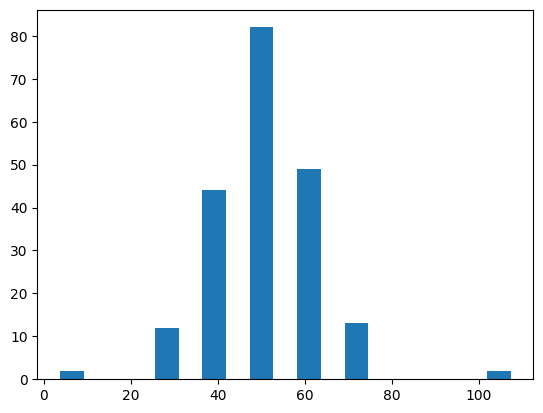

In [ ]:
plt.hist(df["값"],bins=10, rwidth=0.5)   ## histrom, 넓이, bin: 분포
plt.show()

In [ ]:
## 여러가지 방법을 사용하여 판단하게 된다.

IRQ (Interquearile Range, 사분위 범위) 방법
 . IQR Rule을 이용한 이상치 탐색은 사분위 개념으로 출발.
   - 전체 데이터들을 오름차순으로 정렬하고,
     정확히 4등분 (25%, 50%, 75%, 100%)로 나눔.
  - 여기서 75% 지점의 값과, 25% 지점의 값의 차이를 IQR 이라고 한다.

    ( 3사분위 수 - 1차 분위수 )의 차이 가 IQR

 boxblot 을 그렸을 때, 점으로 나오는 샘플들이 바로 IQR Rule에서 말하는 **이상치**

 Q1 - 1.5*IRQ  (mininum 값) 보다 작은 것 ,
 Q3 + 1.5*IQR   (maximum 값) 보다 큰 것
 들을 이상치 라고 한다.

 1.5 정도의 값 (통계적인 값)
     

In [ ]:
## 찾았으면  값을 삭제 하거나,  값을 대체 하거나 한다.

In [ ]:
## IRQ 사용해 보기

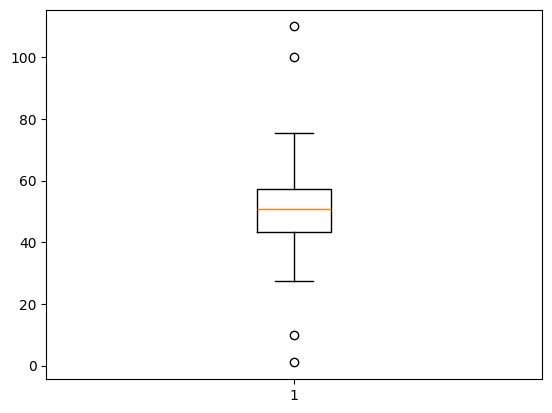

In [ ]:
plt.boxplot(df["값"])
plt.show()

quantile 방식 ( 소숫점) 과  describe 방식 ( % 방식) 으로 사용할 수 있다. 결과값은 동일하다.

In [ ]:
Q1= df["값"].quantile(.25)
Q2= df["값"].quantile(.5)
Q3= df["값"].quantile(.75)
#Q2= df["값"].quantile(.5)
IQR = Q3 - Q1

print("Q1 = ",Q1)
print("Q2 = ",Q2)
print("Q3 = ",Q3)
print("IQR = ",IQR)


Q1 =  43.46774193614255
Q2 =  50.63417826691696
Q3 =  57.19478408951131
IQR =  13.727042153368757


In [ ]:
#describe 함수 사용

In [ ]:
Q1 = df["값"].describe()["25%"]
Q2 = df["값"].describe()["50%"]
Q3 = df["값"].describe()["75%"]
IQR = Q3 - Q1

print("Q1 = ",Q1)
print("Q2 = ",Q2)
print("Q3 = ",Q3)
print("IQR = ",IQR)


Q1 =  43.46774193614255
Q2 =  50.63417826691696
Q3 =  57.19478408951131
IQR =  13.727042153368757


In [ ]:
#둘다 동일한 경과이다.  표현법만 다르다.

In [ ]:
condition = df["값"] > (Q3 + IQR * 1.5)   ## maximum value
upperOutlier = df[condition]
condition = df["값"] > (Q1 - IQR * 1.5)   ## minimum value
lowerOutlier = df[condition]

print(lowerOutlier)
print(upperOutlier)

              값
0     63.063709
1     58.648831
2     50.628711
3     35.776529
4     40.417292
..          ...
197   37.652314
198   57.739459
199   56.441641
502  100.000000
204  110.000000

[202 rows x 1 columns]
         값
502  100.0
204  110.0
